# Initial Situation: 
We have a data record with transaction data and an extract from CRM with the customer data.
The situation takes place on November 30, 2014 and a forecast for incoming payments in December 2014 is desired.
Let's start by reading in the data and preparing or examining the data set.

In [1]:
#importiere die üblchen Libraries
import pandas as pd
import numpy as np
#Lese die Daten ein: Customers and Orders files
orders = pd.read_csv('Orders.csv')
customers = pd.read_csv('Customers.csv')

In [2]:
orders.head()

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,FirstCustomerOrder,CashInDate
0,O-100,2011-01-03,1024,276.1,Same Day,Corporate,Office Supplies,30,5%,Yes,Yes,2011-02-18
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,No,2011-02-18
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,Yes,2011-02-06
3,O-104,2011-01-06,1023,408.3,Standard Class,Consumer,Office Supplies,30,5%,No,Yes,2011-02-17
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,Yes,2011-02-10


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37642 entries, 0 to 37641
Data columns (total 12 columns):
OrderID                  37642 non-null object
InvoiceDate              37642 non-null object
CustomerID               37642 non-null int64
OrderVolume              37633 non-null object
ShipMode                 37642 non-null object
Segment                  37642 non-null object
Category                 37642 non-null object
PaymentTerm              37642 non-null int64
Discount                 37626 non-null object
ExistingPurchaseOrder    37642 non-null object
FirstCustomerOrder       37642 non-null object
CashInDate               37642 non-null object
dtypes: int64(2), object(10)
memory usage: 3.4+ MB


In [4]:
customers.head()

,CustomerID,Customer,Market,CustomerComplaints
0,1000,Didier Evra,Africa,7
1,1001,Jean Tedeaux,Canada,1
2,1002,HBSA LLC,Canada,4
3,1003,Bikes and More SE,EU,0
4,1004,Patrick Johnson,US,7


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
CustomerID            32 non-null int64
Customer              32 non-null object
Market                32 non-null object
CustomerComplaints    32 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


Both tables contain the Customer ID column. The entries there look consistent. First we connect the two Datasets 
over the column 'CustomerID'

In [6]:
data = pd.merge(orders, customers, how = 'left', on='CustomerID' )

In [7]:
data.head()

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,FirstCustomerOrder,CashInDate,Customer,Market,CustomerComplaints
0,O-100,2011-01-03,1024,276.1,Same Day,Corporate,Office Supplies,30,5%,Yes,Yes,2011-02-18,Indonesian Airways Ltd,APAC,0
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,No,2011-02-18,Indonesian Airways Ltd,APAC,0
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,Yes,2011-02-06,Joseph Omer,EMEA,5
3,O-104,2011-01-06,1023,408.3,Standard Class,Consumer,Office Supplies,30,5%,No,Yes,2011-02-17,James King,Africa,8
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,Yes,2011-02-10,Robert Sherbatsky,Canada,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37642 entries, 0 to 37641
Data columns (total 15 columns):
OrderID                  37642 non-null object
InvoiceDate              37642 non-null object
CustomerID               37642 non-null int64
OrderVolume              37633 non-null object
ShipMode                 37642 non-null object
Segment                  37642 non-null object
Category                 37642 non-null object
PaymentTerm              37642 non-null int64
Discount                 37626 non-null object
ExistingPurchaseOrder    37642 non-null object
FirstCustomerOrder       37642 non-null object
CashInDate               37642 non-null object
Customer                 37642 non-null object
Market                   37642 non-null object
CustomerComplaints       37642 non-null int64
dtypes: int64(3), object(12)
memory usage: 4.6+ MB



Strangely enough, only three columns are of type int64, that is, numeric. The rest are object type

In [9]:
print('Rows, Columns:', data.shape)
print('Datatype Count:', data.dtypes.value_counts())

Rows, Columns: (37642, 15)
Datatype Count: object    12
int64      3
dtype: int64


## CashInDate and InvoiceDate
First I transform the columns with invoice date and payment date into the type Datetime

In [10]:
from datetime import datetime, date
data.InvoiceDate = pd.to_datetime(data.InvoiceDate, yearfirst=True, dayfirst=True)
data.CashInDate = pd.to_datetime(data.CashInDate, yearfirst=True, dayfirst=True )

Do we have missing data?

In [11]:
#Missing Values
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum()*100)/(df.isnull().count())
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(output)
    else:
        return(False)

In [12]:
check_missing_data(data)

,Total,Percent,Types
OrderID,0,0.000000,object
InvoiceDate,0,0.000000,datetime64[ns]
CustomerID,0,0.000000,int64
OrderVolume,9,0.023909,object
ShipMode,0,0.000000,object
Segment,0,0.000000,object
Category,0,0.000000,object
PaymentTerm,0,0.000000,int64
Discount,16,0.042506,object
ExistingPurchaseOrder,0,0.000000,object


I assume that the lack of discount data suggests that there has been no discount in these cases.
I fill the 16 missing details about price reduction with 0.

In [13]:
data.Discount.fillna(value =0, inplace = True)


The size of the order is very important. Since there are only 9 records where the information is missing, I remove these lines.

In [14]:
data = data.dropna()

## OrderVolume

In the OrderVolume column, a couple of entries have '$' after the number, which is why the data is not numerical. I remove it and convert the data to numeric.

In [15]:
data.OrderVolume = data.OrderVolume.str.replace('$', '')
data.OrderVolume= pd.to_numeric(data.OrderVolume)

## Discount
Now let's look at the Discount column. What values ​​does this contain?

In [16]:
data.Discount.value_counts()

5%    18742
3%     9438
0%     9437
0        16
Name: Discount, dtype: int64


I remove the% sign and divide the numbers by 100 to get the percentages.

In [17]:
data.Discount = data.Discount.str.replace('%', '')
data.Discount = pd.to_numeric(data.Discount)/100
data.Discount.fillna(value =0, inplace = True)

## Segment

Let's continue the investigation. What are the values ​​in the Segment column?

In [18]:
data.Segment.value_counts()

Consumer     19442
Corporate    18191
Name: Segment, dtype: int64

It is categorical data with two possible outputs. Replace them with 1 and 0.

In [19]:
#Convert it to 0 for Consumer and 1 for Corporate
data.Segment.replace(('Corporate', 'Consumer'), (1, 0), inplace=True)

## ExistingPurchaseOrder
Is there a sales order? Replace 'yes' with 1 and 'no' with 0.

In [20]:
#ersetzte 'Yes' und 'No' durch 1 und 0
data.ExistingPurchaseOrder.replace(('Yes', 'No'), (1, 0), inplace=True)

## FirstCustomerOrder
Und wieder ersetzte 'ja' durch 1 und 'nein' durch 0.

In [21]:
#Gleiches Spiel: ersetzte 'Yes' und 'No' durch 1 und 0
data.FirstCustomerOrder.replace(('Yes', 'No'), (1, 0), inplace=True)

## DaysBetween

Now define our target column. The number of days between the invoice date and receipt of payment

In [22]:
#Definiere die neue Spalte mit Anzahl der Tage zwischen Invoice und Cash In:
data['DaysBetween'] = (data.CashInDate- data.InvoiceDate).apply(lambda x: x.days)


## ShipMode, Category, Market

These columns contain categorical data with several options. I will edit this later with the help of hot-one-coding.

## OrderID
This column does not add to the model and will be removed by me later

## Customer

Contains the same information as CustomerID in the sense of this use case. I also remove this.

In [23]:
data.DaysBetween.value_counts().sort_values().head()

 77     1
-173    1
-165    1
 78     2
 76     3
Name: DaysBetween, dtype: int64

Strangely, we have two cases where the money was received before the invoice was created. These are obviously incorrect. I remove them and look at the distribution of the waiting times.

(array([ 253.,   98.,  204.,  113.,  345.,  210.,  521.,  311.,  689.,
         467.,  921.,  550., 1266.,  659., 1588.,  826., 1856.,  979.,
        2061., 1127., 2232., 1108., 2356., 1118., 2207., 1026., 2024.,
         929., 1755.,  783., 1434.,  731., 1204.,  483.,  923.,  369.,
         592.,  252.,  403.,  132.,  235.,   67.,  104.,   32.,   45.,
          12.,   21.,    4.,    3.,    3.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ,
        19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. , 31.5, 33. , 34.5,
        36. , 37.5, 39. , 40.5, 42. , 43.5, 45. , 46.5, 48. , 49.5, 51. ,
        52.5, 54. , 55.5, 57. , 58.5, 60. , 61.5, 63. , 64.5, 66. , 67.5,
        69. , 70.5, 72. , 73.5, 75. , 76.5, 78. ]),
 <a list of 50 Patch objects>)

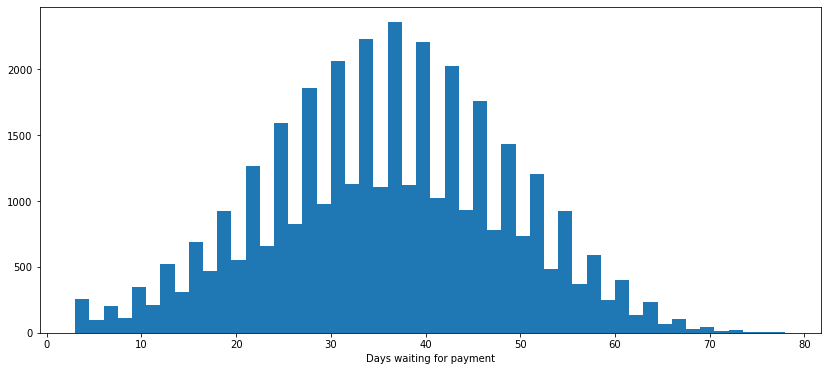

In [24]:
data = data[data.DaysBetween>=0]
#Wie sieht die Verteilung der Wartezeit aus?
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (14,6))
plt.xlabel('Days waiting for payment')
plt.hist(data.DaysBetween, bins = 50)


Nice bell curve of the normal distribution.

## Division into train and test and model preparation

According to the task, we are on November 30th, 2014 and want to make a forecast for December. Sort the data by date of receipt of payment and split it up. We train the model on historical data until November 30th, 2014 and test it on the data for December.

In [25]:
data = data.sort_values('CashInDate')
data_train = data[data.CashInDate<= '2014-11-30'].set_index('InvoiceDate')
data_test= data[data.CashInDate > '2014-11-30'].set_index('InvoiceDate')

Use Pandas' get_dummies () method to convert categorical data to numeric using one-hot-coding.
Define the independent variable X and the target variable y as described above.

In [26]:
data_train = pd.get_dummies(data_train , columns = ['ShipMode', 'Category', 'Market'], dtype=int)
data_test = pd.get_dummies(data_test , columns = ['ShipMode', 'Category', 'Market'], dtype=int)
X_train = data_train.drop(['OrderID','CashInDate', 'Customer', 'DaysBetween'], axis = 1)
X_test = data_test.drop(['OrderID','CashInDate', 'Customer', 'DaysBetween'], axis = 1)
y_train= data_train.DaysBetween
y_test = data_test.DaysBetween

## Prediction

The Random Forest Regressor is very suitable for such tasks. Import the model and train it with 100 decision trees and a maximum depth of 10 to avoid overfitting.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
X_train

,CustomerID,OrderVolume,Segment,PaymentTerm,Discount,ExistingPurchaseOrder,FirstCustomerOrder,CustomerComplaints,ShipMode_First Class,ShipMode_Same Day,...,Category_Furniture,Category_Office Supplies,Category_Technology,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2011-01-09,1020,324.45,0,14,0.05,1,1,4,0,0,...,1,0,0,0,0,0,0,1,0,0
2011-01-14,1031,31.20,0,14,0.03,1,0,4,0,0,...,0,0,1,0,0,0,0,0,0,1
2011-01-17,1031,545.94,0,14,0.05,1,0,4,0,0,...,1,0,0,0,0,0,0,0,0,1
2011-01-13,1031,19.54,0,14,0.05,1,0,4,0,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-18,1031,149.95,0,14,0.05,1,0,4,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-21,1024,37.59,1,30,0.05,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2014-10-20,1027,20.18,0,45,0.05,1,0,3,0,0,...,1,0,0,0,0,0,1,0,0,0
2014-11-04,1031,25.12,0,45,0.05,1,0,4,0,0,...,0,1,0,0,0,0,0,0,0,1


Make a prediction with the model.

In [29]:
prediction = model.predict(X_test)

## Assessment of the model


As a metric for the accuracy, we have the RSME, i.e. the root of the mean square error in the amount of given about 4. Then the model is good enough. Check if the results of this metric are sufficient.

In [30]:
print(np.sqrt(((prediction - y_test) ** 2).mean()))

4.2114325137211175



The result is close to 4. Now check the model's score.

In [31]:
model.score(X_test,y_test)

0.8694131962388318


87% is actually pretty good, first visualize the results: real values ​​vs. the prediction

Text(0.5, 1.0, 'Echt vs Vorhersage')

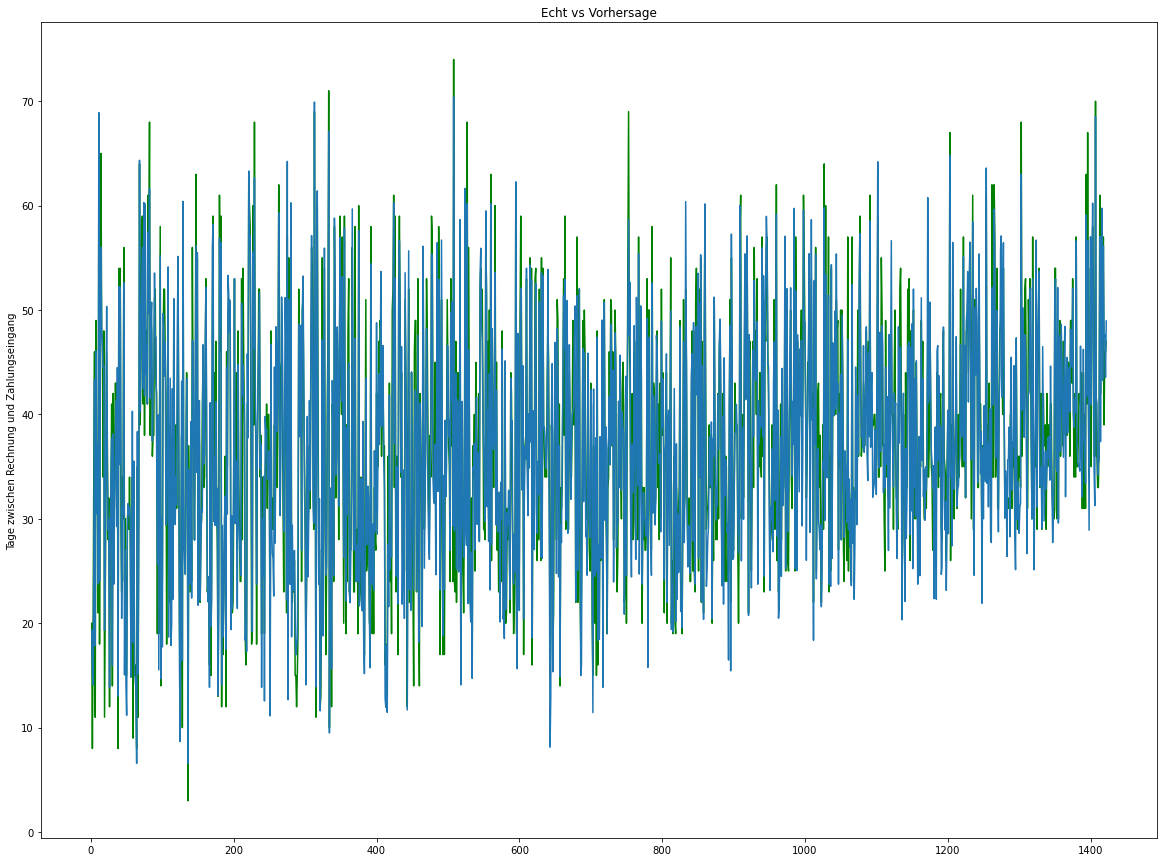

In [32]:
#Visualisiere die Ergebnisse
plt.figure(figsize=(20, 15))
plt.plot(range(1,1423), y_test, color = 'green')
plt.plot(range(1,1423), prediction)
plt.ylabel('Tage zwischen Rechnung und Zahlungseingang')
plt.title('Echt vs Vorhersage')


## Expected Cash In per Day

Now we want to do the second part of the task: aggregate the total of the predicted incoming payments per day in December.
For this we add the column with the real data, as well as the predicted values ​​to the X_test and group it.

In [33]:
X_test['PredictedDays'] = pd.Series(prediction)
X_test= X_test.assign(PredictedDays = prediction)
X_test['RealDays'] = y_test
X_test.PredictedDays = X_test.PredictedDays.apply(lambda x: round(x))


Add the indices back as a column to calculate the day of the incoming payments. Add the predicted and real days to the invoice date.

In [34]:
final_data = X_test.reset_index()

In [35]:
from datetime import timedelta
final_data['PredictedCashInDate'] = final_data.InvoiceDate + final_data.PredictedDays.apply(lambda x: timedelta(days = x))
final_data['CashInDate'] = final_data.InvoiceDate + final_data.RealDays.apply(lambda x: timedelta(days = x))

In [36]:
# Since we know that payment will not be received until December, we will set the date to December 1st if the predicted date is November.

mask = final_data.PredictedCashInDate < '2014-12-01'
column_name = 'PredictedCashInDate'
final_data.loc[mask, column_name] = '2014-12-01'

In [37]:
final_data['PredictedCashInDate'] = pd.to_datetime(final_data['PredictedCashInDate'])


Create a DataFrame in the desired form, as task 2 requires.

In [38]:
prediction_date_cash = final_data.groupby('PredictedCashInDate')['OrderVolume'].sum()


And once for the actual data.

In [39]:
real_date_cash = final_data.groupby('CashInDate')['OrderVolume'].sum()

In [40]:
prediction_date_cash.head()

PredictedCashInDate
2014-12-01    23919.60
2014-12-02     7888.58
2014-12-03     6210.20
2014-12-04     9429.03
2014-12-05     5908.93
Name: OrderVolume, dtype: float64

Visualize the cash in for December. Prediction vs reality.

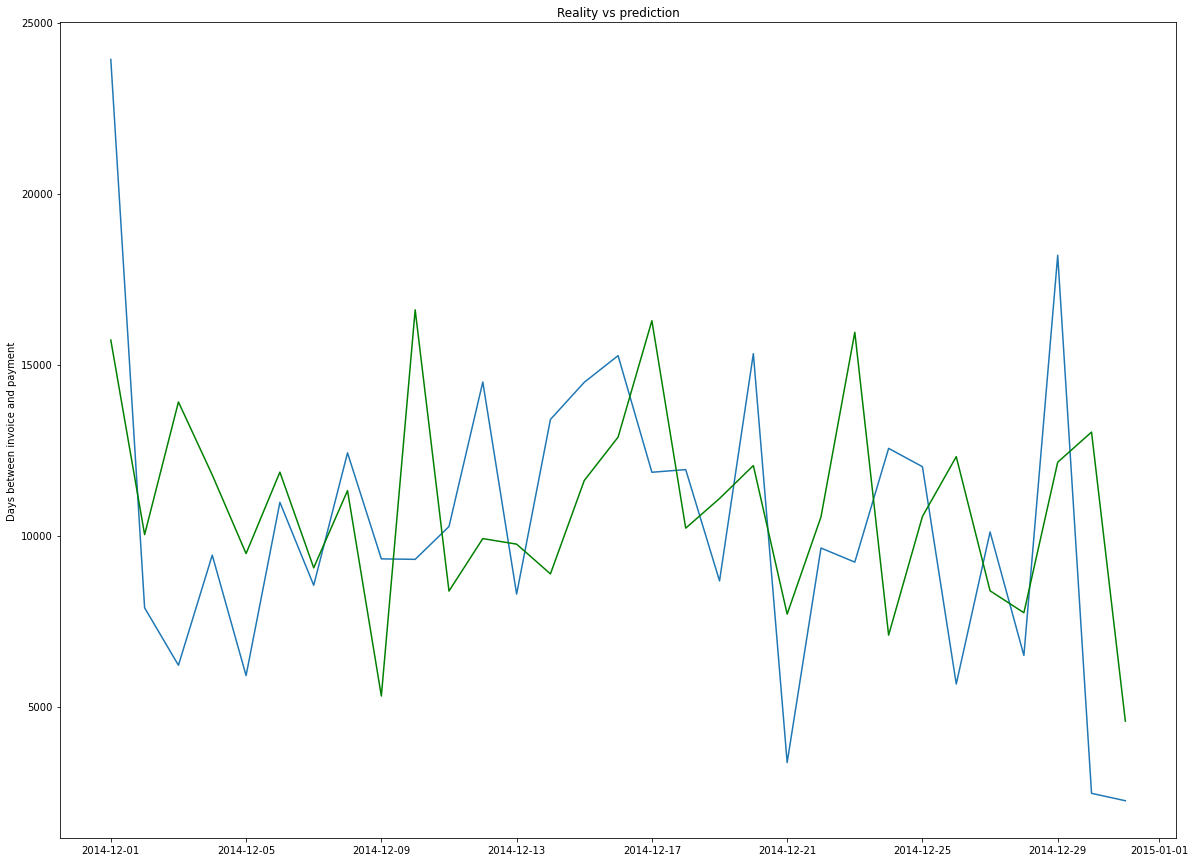

In [43]:
plt.figure(figsize=(20, 15))
plt.ylabel('Days between invoice and payment')
plt.title('Reality vs prediction')
plt.plot(prediction_date_cash.loc[:'2014-12-31'])
plt.plot(real_date_cash , color = 'green')

We made the forecast really well. The trend is definitely recognizable.
Now save the results in an Excel table.

In [42]:
# prediction_date_cash.loc[:'2014-12-31'].to_excel('Expected Cash In December.xls')